In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Analysis of stat

In [2]:
stat_df1 = pd.read_csv('../result/experiment_bound/stat_RQ_best_start_no_bound.csv')
stat_df1['bounded'] = False
stat_df2 = pd.read_csv('../result/experiment_best_start/stat_RQ_best_start.csv')
stat_df2['bounded'] = True
stat_df = pd.concat([stat_df1, stat_df2])
stat_df

,quantile,model,method,trial,loss,hit_rate_in,hit_rate_out,dq_in,dq_out,binom_in,binom_out,traffic_in,traffic_out,kupiec_in,kupiec_out,independent_in,independent_out,bounded
0,0.05,adaptive,RQ,0,0.128174,0.048515,0.044932,0.618006,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.961090,False
1,0.05,adaptive,RQ,1,0.128174,0.048515,0.044932,0.618009,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.961090,False
2,0.05,adaptive,RQ,2,0.128174,0.048515,0.044932,0.618005,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.961090,False
3,0.05,adaptive,RQ,3,0.128174,0.048515,0.044932,0.618007,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.961090,False
4,0.05,adaptive,RQ,4,0.128174,0.048515,0.044932,0.618007,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.961090,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.01,igarch,RQ,25,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.000000,1.000000,0.992732,0.676898,True
236,0.01,igarch,RQ,26,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.000000,1.000000,0.992732,0.676898,True
237,0.01,igarch,RQ,27,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.000000,1.000000,0.992732,0.676898,True
238,0.01,igarch,RQ,28,0.034215,0.010074,0.013158,1.000000,0.992330,0.934696,0.192984,green,green,1.000000,1.000000,0.993802,0.676898,True


In [3]:
stat_to_csv_df = {
    'model': [],
    'quantile': [],
    'loss': [],
    'unbounded\'s loss': [],
    'bounded\'s loss': [],
    'hit_rate_in': [],
    'unbounded\'s hit_rate_in': [],
    'bounded\'s hit_rate_in': [],
    'hit_rate_out': [],
    'unbounded\'s hit_rate_out': [],
    'bounded\'s hit_rate_out': [],
}

keys = [key for key in stat_to_csv_df][2:]

for q in stat_df['quantile'].unique():
    for mod in stat_df['model'].unique():
        cond1 = stat_df['quantile']==q
        cond2 = stat_df['model']==mod
        
        stat_to_csv_df['model'].append(mod)
        stat_to_csv_df['quantile'].append(q)
        
        for i, metric in enumerate(stat_df.columns[4:7]):
            try:
                x = stat_df[(stat_df['method']=='RQ')&(stat_df['bounded']==False)&cond1&cond2][metric]
                y = stat_df[(stat_df['method']=='RQ')&(stat_df['bounded']==True)&cond1&cond2][metric]
                if metric=='loss':
                    print('loss:', x.mean() < y.mean())
                if metric=='hit_rate_in':
                    print('hit_rate_in:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                if metric=='hit_rate_out':
                    print('hit_rate_out:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                stat_to_csv_df[keys[i*3]].append('accepted' if mannwhitneyu(x, y)[1] > 0.05 else 'rejected')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))
            except:
                # they are exactly the same 
                stat_to_csv_df[keys[i*3]].append('accepted')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))

loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: True
loss: False
hit_rate_in: True
hit_rate_out: False
loss: True
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: True
hit_rate_out: False
loss: False
hit_rate_in: True
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: True


In [4]:
pd.DataFrame(stat_to_csv_df).T.to_csv('../result/stat_test/stat_RQ_bounds_analysis_res.csv')
pd.DataFrame(stat_to_csv_df).T

,0,1,2,3,4,5,6,7
model,adaptive,symmetric,asymmetric,igarch,adaptive,symmetric,asymmetric,igarch
quantile,0.05,0.05,0.05,0.05,0.01,0.01,0.01,0.01
loss,accepted,rejected,accepted,rejected,accepted,accepted,rejected,rejected
unbounded's loss,0.128174,0.126788,0.124139,0.127106,0.03856,0.034448,0.040231,0.034337
bounded's loss,0.128174,0.126727,0.124139,0.126249,0.038675,0.034448,0.033471,0.034215
hit_rate_in,accepted,accepted,rejected,accepted,accepted,accepted,accepted,accepted
unbounded's hit_rate_in,0.048515,0.050424,0.050283,0.049867,0.008943,0.010092,0.02158,0.010048
bounded's hit_rate_in,0.048515,0.050124,0.050203,0.050203,0.008952,0.010039,0.010074,0.010277
hit_rate_out,rejected,rejected,rejected,accepted,rejected,rejected,rejected,accepted
unbounded's hit_rate_out,0.044932,0.039616,0.036749,0.040329,0.008877,0.015342,0.030685,0.013096


# Analysis of beta

In [5]:
beta_df1 = pd.read_csv('../result/experiment_bound/beta_RQ_best_start_no_bound.csv')
beta_df1['bounded'] = False
beta_df2 = pd.read_csv('../result/experiment_best_start/beta_RQ_best_start.csv')
beta_df2['bounded'] = True
beta_df = pd.concat([beta_df1, beta_df2])
beta_df

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial,bounded
0,beta1,-0.655156,0.041276,4.900000e-57,0.05,adaptive,RQ,0,False
1,beta1,-0.655151,0.041270,4.740000e-57,0.05,adaptive,RQ,1,False
2,beta1,-0.655157,0.041278,4.960000e-57,0.05,adaptive,RQ,2,False
3,beta1,-0.655155,0.041275,4.890000e-57,0.05,adaptive,RQ,3,False
4,beta1,-0.655155,0.041275,4.890000e-57,0.05,adaptive,RQ,4,False
...,...,...,...,...,...,...,...,...,...
655,beta2,0.880204,0.029761,1.530000e-192,0.01,igarch,RQ,28,True
656,beta3,0.567895,0.212448,3.757687e-03,0.01,igarch,RQ,28,True
657,beta1,0.247952,0.083566,1.502875e-03,0.01,igarch,RQ,29,True
658,beta2,0.884276,0.029021,3.280000e-204,0.01,igarch,RQ,29,True


beta1 4.7666042556408407e-07


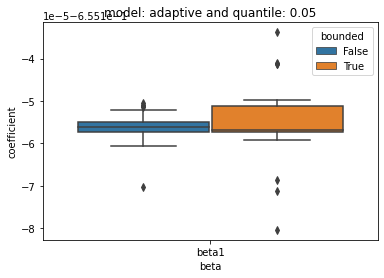

beta1 0.00026320209159389916


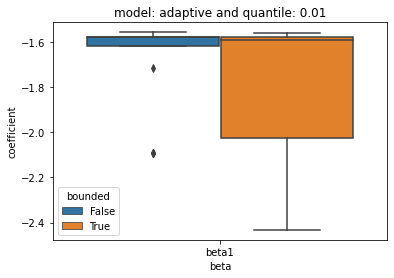

beta1 4.7666042556408407e-07
beta2 5.332838869298223e-08
beta3 5.332838869298223e-08


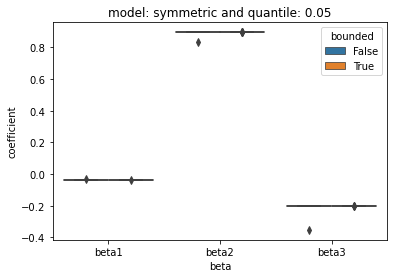

beta1 0.00026320209159389916
beta2 0.0004282057774935955
beta3 0.025060119631000688


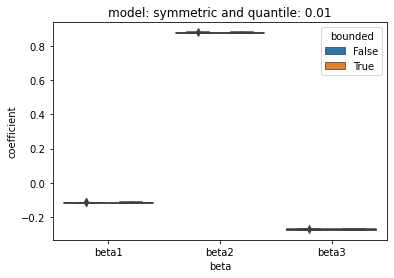

beta1 4.7666042556408407e-07
beta2 5.332838869298223e-08
beta3 5.332838869298223e-08
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


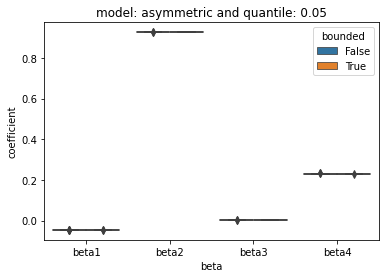

beta1 0.00026320209159389916
beta2 0.0004282057774935955
beta3 0.025060119631000688
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


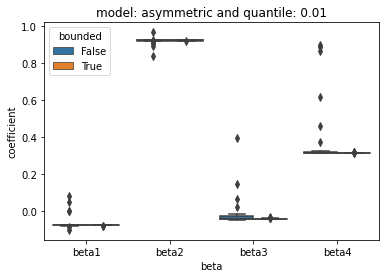

beta1 4.7666042556408407e-07
beta2 5.332838869298223e-08
beta3 5.332838869298223e-08


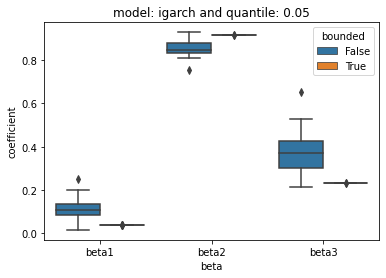

beta1 0.00026320209159389916
beta2 0.0004282057774935955
beta3 0.025060119631000688


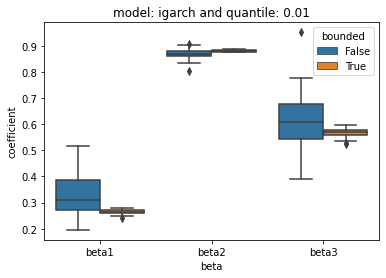

In [8]:
for model in beta_df.model.unique():
    for q in beta_df['quantile'].unique():
        plt.figure()
        sns.boxplot(
            data=beta_df[(beta_df['model']==model)&(beta_df['quantile']==q)&(beta_df['method']=='RQ')],
            x='beta',
            y='coefficient',
            hue='bounded'
        )
        cond1 = beta_df['quantile']==q
        cond2 = beta_df['model']==mod
        plt.title(f'model: {model} and quantile: {q}')
        for beta in beta_df[beta_df['model']==model].beta.unique():
            cond3 = beta_df['beta']==beta
            x = beta_df[(beta_df['method']=='RQ')&(beta_df['bounded']==True)&cond1&cond2&cond3]['coefficient']
            y = beta_df[(beta_df['method']=='RQ')&(beta_df['bounded']==False)&cond1&cond2&cond3]['coefficient']
            print(beta, mannwhitneyu(x, y)[1])        
        plt.show()

In [10]:
beta_df[beta_df['method']=='RQ'].groupby(
    ['model','quantile','beta','bounded']
).mean()

coefficient  S.E. of beta   pval of beta  \
model      quantile beta  bounded                                             
adaptive   0.01     beta1 False      -1.640094      0.005416   0.000000e+00   
                          True       -1.771917      0.007383   0.000000e+00   
           0.05     beta1 False      -0.655156      0.041276   4.913000e-57   
                          True       -0.655155      0.041275   4.888000e-57   
asymmetric 0.01     beta1 False      -0.061581      0.011971   2.751641e-02   
                          True       -0.074280      0.011132   1.499033e-11   
                    beta2 False       0.917579      0.009874  3.933333e-197   
                          True        0.921241      0.009030   0.000000e+00   
                    beta3 False      -0.009759      0.055351   2.306047e-01   
                          True       -0.039139      0.053919   2.342330e-01   
                    beta4 False       0.389823      0.054589   6.449613e-05   
                          True        0.314895      0.034135   2.703667e-20   
           0.05     beta1 False      -0.045732      0.009809   1.577100e-06   
                          True       -0.045739      0.009810   1.565000e-06   
                    beta2 False       0.926389      0.022927   0.000000e+00   
                          True        0.926441      0.022994   0.000000e+00   
                    beta3 False       0.003277      0.051532   4.746456e-01   
                          True        0.003369      0.051637   4.739866e-01   
                    beta4 False       0.231276      0.070175   4.929816e-04   
                          True        0.231145      0.070338   5.079143e-04   
igarch     0.01     beta1 False       0.330880      0.112930   2.856104e-03   
                          True        0.265364      0.088905   1.487509e-03   
                    beta2 False       0.868218      0.043112   3.306757e-32   
                          True        0.880091      0.034103   7.266667e-60   
                    beta3 False       0.608010      0.309732   3.640469e-02   
                          True        0.566952      0.250336   1.718991e-02   
           0.05     beta1 False       0.106279      0.048747   4.193217e-02   
                          True        0.040198      0.024978   5.377460e-02   
                    beta2 False       0.855077      0.039511   1.191667e-21   
                          True        0.914972      0.014460   0.000000e+00   
                    beta3 False       0.373456      0.125235   6.245844e-03   
                          True        0.231735      0.030558   1.293333e-07   
symmetric  0.01     beta1 False      -0.118891      0.024297   5.002667e-07   
                          True       -0.118824      0.024253   4.835667e-07   
                    beta2 False       0.877032      0.013612   0.000000e+00   
                          True        0.877067      0.013593   0.000000e+00   
                    beta3 False      -0.274598      0.025433   2.617530e-27   
                          True       -0.274555      0.025406   2.279053e-27   
           0.05     beta1 False      -0.037060      0.045528   2.074735e-01   
                          True       -0.037341      0.045963   2.082753e-01   
                    beta2 False       0.892349      0.054438   5.417253e-58   
                          True        0.894560      0.055064   7.679267e-59   
                    beta3 False      -0.205071      0.071104   2.507488e-03   
                          True       -0.199794      0.071014   2.457150e-03   

                                   trial  
model      quantile beta  bounded         
adaptive   0.01     beta1 False     14.5  
                          True      14.5  
           0.05     beta1 False     14.5  
                          True      14.5  
asymmetric 0.01     beta1 False     14.5  
                          True      14.5  
                    beta2 False     14.5  
             